# Advanced Probability and Statistics

# Statistical Modeling

In this assignment, you will perform hypothesis testing, calculate correlation coefficients, build linear regression models, and diagnose potential issues in the models using Python.

Tasks:

1. Hypothesis: Locate a dataset containing the heights, weights, and ages of at least 500 individual males and females. Conduct a hypothesis test to determine whether there is a significant difference in the mean weight between males and females. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

2. Correlation Coefficient: Using the same dataset as in Task 1, calculate the correlation coefficient between height and weight. Interpret the coefficient and visualize the relationship between the two variables using a scatter plot. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

3. Linear Regression Model:  Using the same dataset as in Task 1, build a linear regression model to predict weight based on height. Perform model verification to determine potential issues, such as heteroscedasticity or multicollinearity, and address any identified issues. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

4. Multiple Regression Model: Continuing with the dataset from Task 3, build a multiple regression model to predict weight based on height and age. Perform model verification to determine potential issues, such as heteroscedasticity or multicollinearity, and address any identified issues. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

5. Solutions: Identify and discuss two common assumptions of linear regression models. Using a dataset of your choice, build a linear regression model that violates one of these assumptions. Perform model verification to determine any violation and propose a solution to address the issue. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

6. Nonlinear Model: Using the same dataset as in Task 5, propose a non-linear model to predict the response variable. Compare the performance of the non-linear model to that of the linear regression model built in Task 5, using appropriate metrics. Write a report discussing your findings, including relevant statistics, visualizations, and interpretations. Use Python to perform the analysis and include the relevant code in a Jupyter notebook.

### Introduction:

In this work, we will develop various statistical analysis techniques and predictive modeling methods using Python. 

The work is divided into several tasks, each designed to address specific aspects of data analysis and modeling. We'll start by performing hypothesis tests to determine whether there is a significant difference between the average weight of men and women. 
Next, we'll calculate correlation coefficients to quantify the relationship between height and weight.

Next, we will study linear regression modeling to predict weight as a function of height, focusing on model verification to identify and resolve potential problems such as heteroscedasticity. 
We will then extend our analysis to multiple regression models, incorporating additional predictors such as age.

In addition, we will explore the common assumptions of linear regression models and demonstrate how violations of these assumptions can be detected and dealt with. We will propose and compare the performance of non-linear models for predicting the response variable.

Throughout the course, we'll harness the power of Python and Jupyter notepads to perform analysis, visualize results and generate insightful interpretations. 

## 1. Hypothesis

To carry out this task, we will search for a data set containing the heights, weights and ages of at least 500 men and women. We will carry out a hypothesis test to determine whether there is a significant difference between the average weight of men and women. 

### Objective: 
Conduct a hypothesis test to determine whether there is a significant difference in the mean weight between males and females.


### Hypothesis:

Null Hypothesis (H0): There is no significant difference in the mean weight between males and females.

Alternative Hypothesis (H1): There is a significant difference in the mean weight between males and females.

### Step 1: Import Packages and load dataset

In [302]:
#Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# Import the statsmodel module.
import statsmodels.api as sm

# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

#### Dataset:
We have a dataset containing the heights, weights, and ages of and females.

In [303]:
#read the dataset
df = pd.read_csv("BodyFat - Extended.csv")
df.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


#### extract: Sex, Age, Weight, and Height 

in the data set, we will extract Sex, Age, Weight, and Height.

In [304]:
#extract only Sex, Age, Weight, and Height 
df1 = df[["Sex", "Age", "Weight", "Height"]]
df1.head()

,Sex,Age,Weight,Height
0,M,23,69.97,1.72
1,M,22,78.59,1.84
2,M,22,69.85,1.68
3,M,26,83.80,1.84
4,M,24,83.58,1.81


### Step 2: data set exploration.

 we present the descriptive statistics of the data. 

In [305]:
# Exploration of dataframe (df1):


print("Use head() to show a sample of data")
print(df1.head())
print("")
print("Use describe() to summarize DF1")
print(df1.describe(include='all'))
print("")
print("For a more thorough examination of observations by SEX use values_counts()")
print(df1['Sex'].value_counts())


Use head() to show a sample of data
  Sex  Age  Weight  Height
0   M   23   69.97    1.72
1   M   22   78.59    1.84
2   M   22   69.85    1.68
3   M   26   83.80    1.84
4   M   24   83.58    1.81

Use describe() to summarize DF1
        Sex         Age      Weight      Height
count   436  436.000000  436.000000  436.000000
unique    2         NaN         NaN         NaN
top       M         NaN         NaN         NaN
freq    252         NaN         NaN         NaN
mean    NaN   34.545872   72.282203    1.734048
std     NaN   15.500099   15.464366    0.098359
min     NaN    1.000000   42.184800    0.750000
25%     NaN   21.000000   59.875200    1.668780
50%     NaN   28.500000   70.815800    1.730000
75%     NaN   46.000000   81.560000    1.800000
max     NaN   81.000000  164.720000    1.970000

For a more thorough examination of observations by SEX use values_counts()
Sex
M    252
F    184
Name: count, dtype: int64


## Step 3: data clining.

In [306]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     436 non-null    object 
 1   Age     436 non-null    int64  
 2   Weight  436 non-null    float64
 3   Height  436 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.8+ KB


In [307]:
#determine missing value
df1.isnull()

,Sex,Age,Weight,Height
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
431,False,False,False,False
432,False,False,False,False
433,False,False,False,False
434,False,False,False,False


In [308]:
df1.isnull().sum().sum()

0

we have no missing value

C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


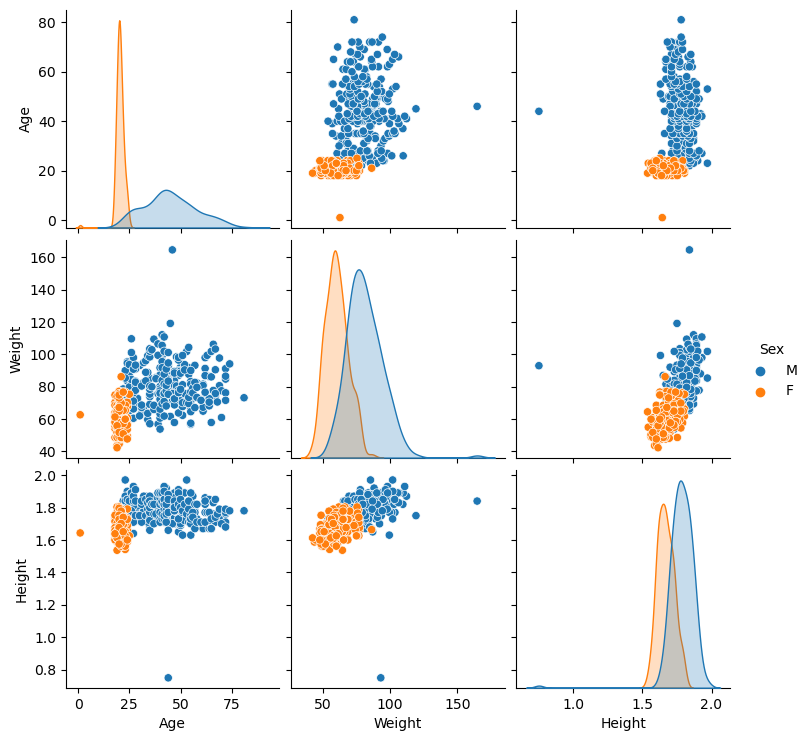

In [309]:
p = sns.pairplot(df1, hue= "Sex")

#### Outlier Identification 

1. Height

<Axes: >

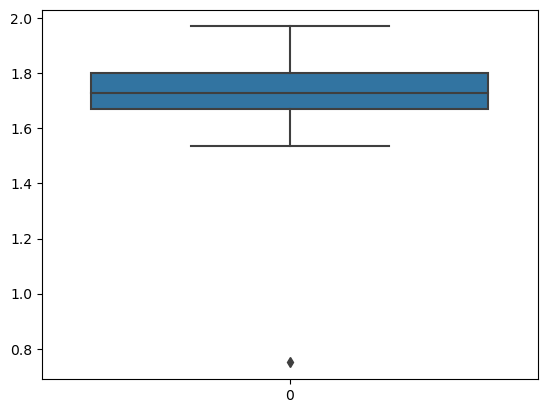

In [310]:
#boxplot 
sns.boxplot(df1.Height)

we have one outlier on Height data

#### we remove outlier

In [311]:
# Define a function to remove outliers based on z-score

df1['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df1
#df[['Height', 'Weight']]

C:\Users\ARMAND\AppData\Local\Temp\ipykernel_17612\1057526747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()


,Sex,Age,Weight,Height,zscore
0,M,23,69.9700,1.7200,-0.142823
1,M,22,78.5900,1.8400,1.077198
2,M,22,69.8500,1.6800,-0.549497
3,M,26,83.8000,1.8400,1.077198
4,M,24,83.5800,1.8100,0.772193
...,...,...,...,...,...
431,F,23,59.8752,1.5621,-1.748168
432,F,21,48.5352,1.5748,-1.619049
433,F,20,51.7104,1.5748,-1.619049
434,F,22,50.8032,1.6510,-0.844336


In [312]:
df1[(df1.zscore<-3) | (df1.zscore>3)]

,Sex,Age,Weight,Height,zscore
41,M,44,92.99,0.75,-10.004664


In [313]:
#df_no_outliers
df1 = df1[(df1.zscore>-3) & (df1.zscore<3)]
print(df1)

    Sex  Age   Weight  Height    zscore
0     M   23  69.9700  1.7200 -0.142823
1     M   22  78.5900  1.8400  1.077198
2     M   22  69.8500  1.6800 -0.549497
3     M   26  83.8000  1.8400  1.077198
4     M   24  83.5800  1.8100  0.772193
..   ..  ...      ...     ...       ...
431   F   23  59.8752  1.5621 -1.748168
432   F   21  48.5352  1.5748 -1.619049
433   F   20  51.7104  1.5748 -1.619049
434   F   22  50.8032  1.6510 -0.844336
435   F   24  47.6280  1.6002 -1.360811

[435 rows x 5 columns]


2. Weight

<Axes: >

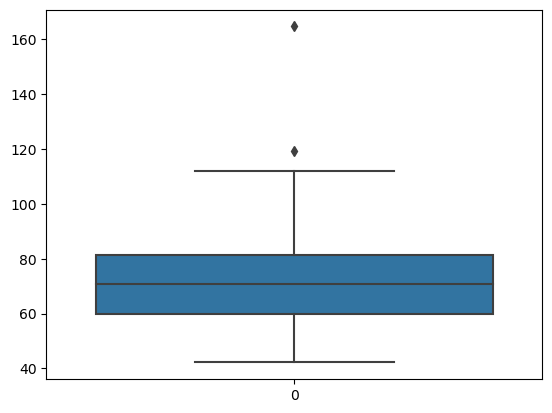

In [314]:
#boxplot 
sns.boxplot(df1.Weight)

we have two outliers on weight data.

#### we remove outliers

In [315]:
# Define a function to remove outliers based on z-score

#z_scores = np.abs((df1 - df1.mean()) / df1.std())

df1['zscore'] = ( df.Weight - df.Weight.mean() ) / df.Weight.std()
df1

C:\Users\ARMAND\AppData\Local\Temp\ipykernel_17612\4027136351.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore'] = ( df.Weight - df.Weight.mean() ) / df.Weight.std()


,Sex,Age,Weight,Height,zscore
0,M,23,69.9700,1.7200,-0.149518
1,M,22,78.5900,1.8400,0.407892
2,M,22,69.8500,1.6800,-0.157278
3,M,26,83.8000,1.8400,0.744796
4,M,24,83.5800,1.8100,0.730570
...,...,...,...,...,...
431,F,23,59.8752,1.5621,-0.802296
432,F,21,48.5352,1.5748,-1.535595
433,F,20,51.7104,1.5748,-1.330271
434,F,22,50.8032,1.6510,-1.388935


In [316]:
df1[(df1.zscore<-3) | (df1.zscore>3)]

,Sex,Age,Weight,Height,zscore
38,M,46,164.72,1.84,5.977471
40,M,45,119.18,1.75,3.032636


In [317]:

#df_no_outliers
df1 = df1[(df1.zscore>-3) & (df1.zscore<3)]
print(df1)

    Sex  Age   Weight  Height    zscore
0     M   23  69.9700  1.7200 -0.149518
1     M   22  78.5900  1.8400  0.407892
2     M   22  69.8500  1.6800 -0.157278
3     M   26  83.8000  1.8400  0.744796
4     M   24  83.5800  1.8100  0.730570
..   ..  ...      ...     ...       ...
431   F   23  59.8752  1.5621 -0.802296
432   F   21  48.5352  1.5748 -1.535595
433   F   20  51.7104  1.5748 -1.330271
434   F   22  50.8032  1.6510 -1.388935
435   F   24  47.6280  1.6002 -1.594259

[433 rows x 5 columns]


3. Age

<Axes: >

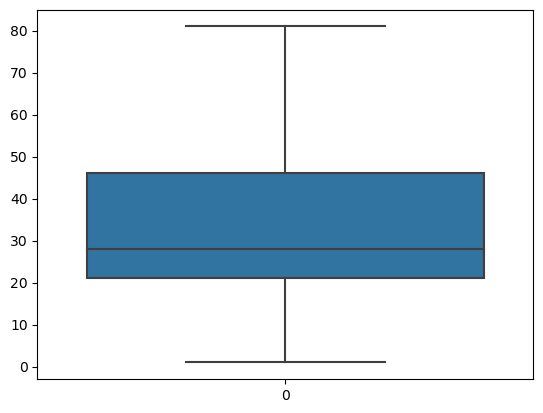

In [318]:
#boxplot 
sns.boxplot(df1.Age)

We do not have outlier on Age data.

## Step 4: Separate data for males and females

In [319]:
# Separate data for males and females
male_data = df1[df1['Sex'] == 'M']
male_data = male_data[["Sex",  "Weight"]]

female_data = df1[df1['Sex'] == 'F']
female_data = female_data[["Sex",  "Weight"]]


In [320]:
male_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     249 non-null    object 
 1   Weight  249 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [321]:
female_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 252 to 435
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     184 non-null    object 
 1   Weight  184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


## Step 5: Perform independent samples t-test

In [322]:
# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(male_data['Weight'], female_data['Weight'])


In [323]:
#Calculate relevant statistics
effect_size = np.abs((male_data['Weight'].mean() - female_data['Weight'].mean()) / np.sqrt((male_data['Weight'].std() ** 2 + female_data['Weight'].std() ** 2) / 2))



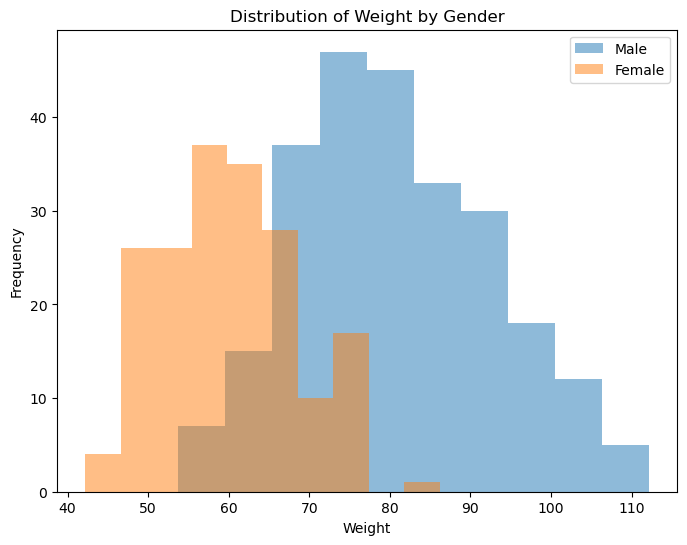

In [324]:
#Visualize the data and results
plt.figure(figsize=(8, 6))
plt.hist(male_data['Weight'], alpha=0.5, label='Male')
plt.hist(female_data['Weight'], alpha=0.5, label='Female')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Weight by Gender')
plt.legend()
plt.show()



In [325]:
# Write a report discussing the findings
print('Independent Samples t-test Results:')
print('t-statistic:', t_statistic)
print('p-value:', p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in mean weight between males and females.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean weight between males and females.")



Independent Samples t-test Results:
t-statistic: 19.912685116492046
p-value: 4.923473580611546e-63
Reject the null hypothesis. There is a significant difference in mean weight between males and females.


#### Conclusion:
Based on the results of the t-test, we reject the null hypothesis and conclude that there is a significant difference in the mean weight between males and females.

# Question2: Correlation Coefficient:

In this task, we will explore the relationship between height and weight in our dataset. Specifically, we'll calculate the correlation coefficient between these two variables to quantify the strength and direction of their association. 

In [326]:
# Calculate the correlation coefficient
correlation_coefficient = df1['Height'].corr(df1['Weight'])


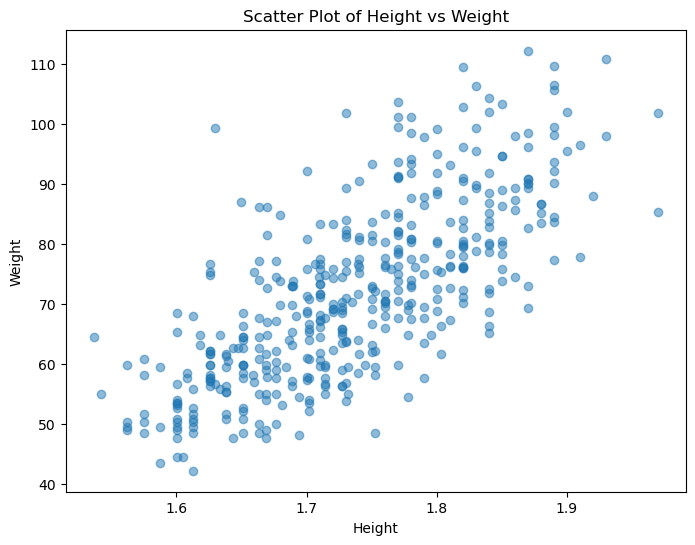

In [327]:
# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df1['Height'], df1['Weight'], alpha=0.5)
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()



In [328]:
# Step 4: Print the correlation coefficient
print(f'Correlation Coefficient between Height and Weight: {correlation_coefficient}')

Correlation Coefficient between Height and Weight: 0.7316352984698637


The correlation is positive, so we have a positive association.

# Question3: Linear Regression Model

In this task, we aim to build a linear regression model to predict weight as a function of height using the dataset from Task 1. Linear regression is a fundamental statistical method used to model the relationship between a dependent variable (weight) and one or more independent variables (height). By building this model, we can understand how changes in height can affect weight.

In [329]:
#extract only Sex, Age, Weight, and Height 
df1 = df1[["Sex", "Age", "Weight", "Height"]]
df1.head()

,Sex,Age,Weight,Height
0,M,23,69.97,1.72
1,M,22,78.59,1.84
2,M,22,69.85,1.68
3,M,26,83.80,1.84
4,M,24,83.58,1.81


C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


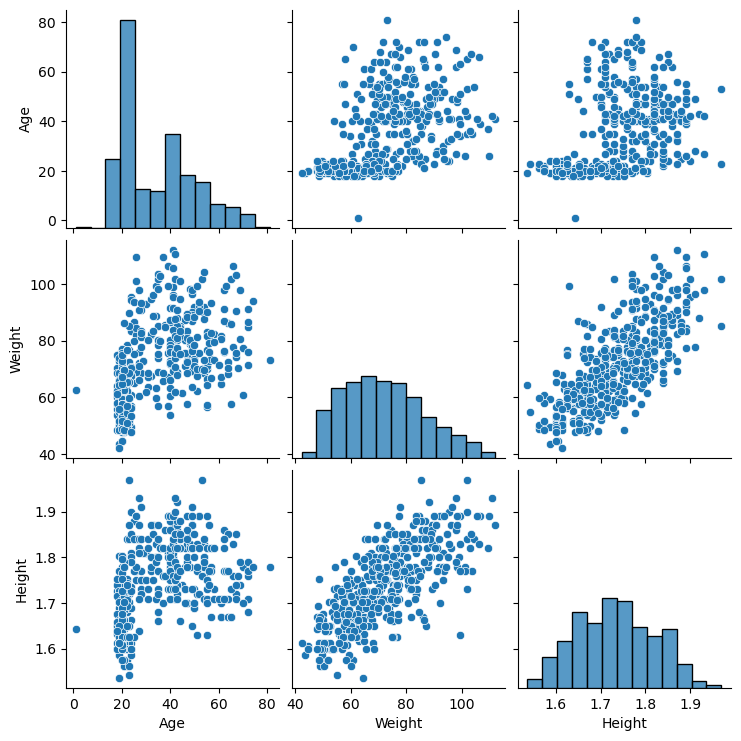

In [330]:
# Create a pairplot of the data.

sns.pairplot(df1);

In [331]:
#  Prepare the data
X = df1[['Height']]  # Feature: Height
y = df1['Weight']    # Target variable: Weight



### Build and fit the model

for this calculation we will use OLS (Ordinary Least Squares), which is a method used in linear regression to estimate the parameters of a linear regression model. The OLS formula specifies the relationship between the dependent variable and one or more independent variables in the linear regression model.

In [332]:
# Define the OLS formula.
ols_formula = 'Height ~ Weight'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = df1)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     496.5
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           9.93e-74
Time:                        06:41:14   Log-Likelihood:                 612.20
No. Observations:                 433   AIC:                            -1220.
Df Residuals:                     431   BIC:                            -1212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4258      0.014    100.336      0.000       1.398       1.454
Weight         0.0043      0.000     22.281      0.000       0.004       0.005
==============================================================================
Omnibus:                        0.755   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.580
Skew:                          -0.074   Prob(JB):                        0.748
Kurtosis:                       3.101   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

    Linearity
    
    Independent Observations

    Homoscedasticity



### - linearity
The linearity assumption requires a linear relationship between the independent and dependent variables. 

Let's create a scatterplot comparing the variable Height you've selected with the variable Weight.

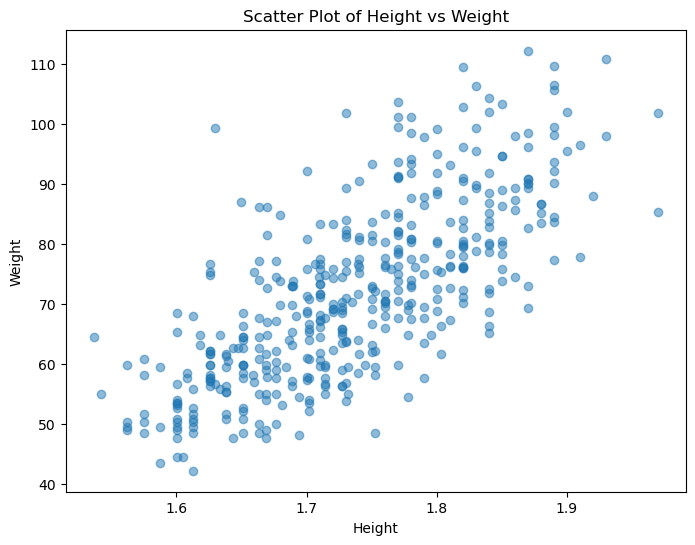

In [246]:
# Create a scatterplot comparing Height and Sales Weight.
# visualize the relationship between the features and the response using scatterplots
plt.figure(figsize=(8, 6))
plt.scatter(df1['Height'], df1['Weight'], alpha=0.5)
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


the scatterplot of the dependent variable versus the independent variable appears to follow a straight line, suggesting that the linearity assumption is met.

### independent
The independent observation assumption states that each observation in the data set is independent. As each line is independent of the others, the independence assumption is not violated.

- Calculate the residuals

In [334]:
# Calculate the residuals.


residuals = model.resid

residuals.head()

0   -0.007658
1    0.075152
2   -0.047140
3    0.052674
4    0.023623
dtype: float64

In [335]:
residuals.mean()

3.917830904450899e-16

### homoscedasticity

The assumption of homoscedasticity (constant variance) is that the residuals have a constant variance for all values of X.

Let's check that this assumption is not violated by creating a scatterplot with fitted values and residuals. Let's add a line at 𝑦=0
to display the variance of the residuals above and below 𝑦=0.

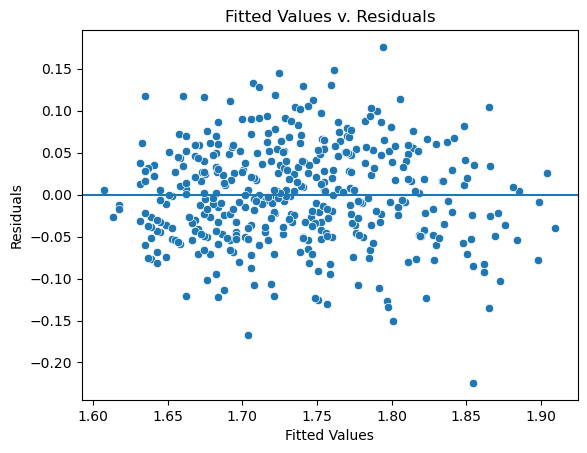

In [188]:
# we create a scatter plot with the model's fitted values and residuals..


fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# we Set the x-axis label.
fig.set_xlabel("Fitted Values")

# we Set the y-axis label.
fig.set_ylabel("Residuals")

# we Set the title.
fig.set_title("Fitted Values v. Residuals")

#  we add a line at y = 0 to visualize the variance of residuals above and below 0.


fig.axhline(0)

plt.show()

The variance of the residuals is consistant across all 𝑋. Thus, the assumption of homoscedasticity is met.

### In conclusion,
the scatterplot of the dependent variable versus the independent variable appears to follow a straight line and the residuals are randomly distributed around zero, suggesting that the linearity assumption is met. In this case, the linear regression model may be appropriate to predict the relationship between variables.

# 4. Multiple Regression Model

In this task, we aim to build a multiple regression model to predict weight based on height and age using the dataset from Task 3. Multiple regression extends the concept of regression simple linear by incorporating multiple predictor variables to predict the response variable.

C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


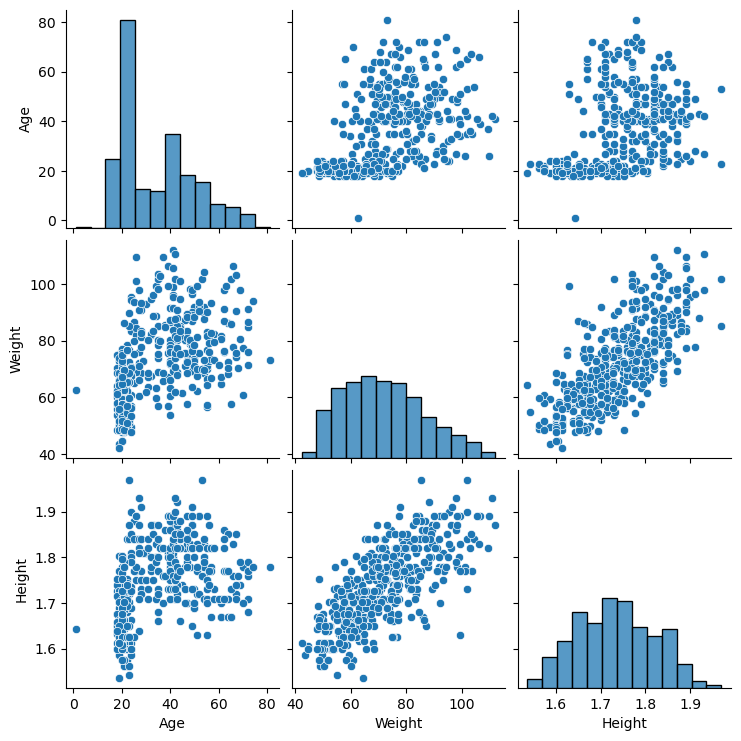

In [247]:
# pairplot of the data.

sns.pairplot(df1);

for this calculation we will use OLS (Ordinary Least Squares), which is a method used in linear regression to estimate the parameters of a linear regression model. The OLS formula specifies the relationship between the dependent variable and one or more independent variables in the linear regression model.

In [190]:
# Define the OLS formula.

ols_formula = 'Weight ~ Height + Age'

# Create an OLS model.



OLS = ols(formula = ols_formula, data = df1)
# Fit the model.


model = OLS.fit()

# Save the results summary.


model_results = model.summary()

# Display the model results.


model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     310.2
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           4.03e-84
Time:                        00:41:56   Log-Likelihood:                -1583.1
No. Observations:                 433   AIC:                             3172.
Df Residuals:                     430   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -118.0328      9.688    -12.183      0.000    -137.075     -98.991
Height       104.5024      5.828     17.931      0.000      93.047     115.957
Age            0.2473      0.032      7.624      0.000       0.184       0.311
==============================================================================
Omnibus:                       21.195   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.920
Skew:                           0.546   Prob(JB):                     1.05e-05
Kurtosis:                       3.281   Cond. No.                         946.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

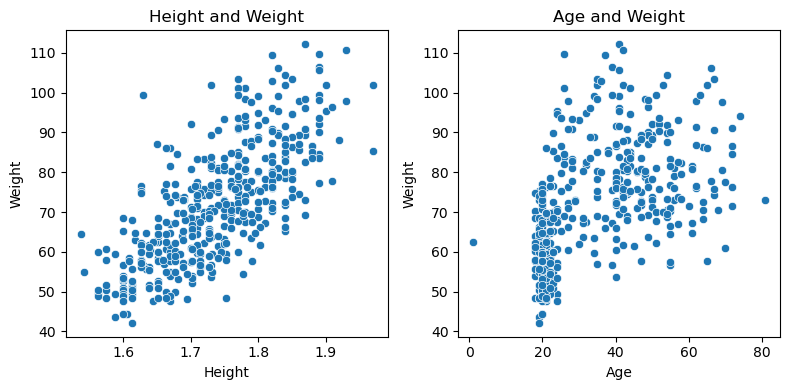

In [191]:
# Create a scatterplot for each independent variable and the dependent variable.


# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a scatterplot between Radio and Sales.
sns.scatterplot(x = df1['Height'], y = df1['Weight'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Height and Weight")

# Create a scatterplot between Social Media and Sales.
sns.scatterplot(x = df1['Age'], y = df1['Weight'],ax=axes[1])


# Set the title of the second plot.
axes[1].set_title("Age and Weight")

# Set the xlabel of the second plot.
axes[1].set_xlabel("Age")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

In [248]:
# Calculate the residuals.


residuals = model.resid



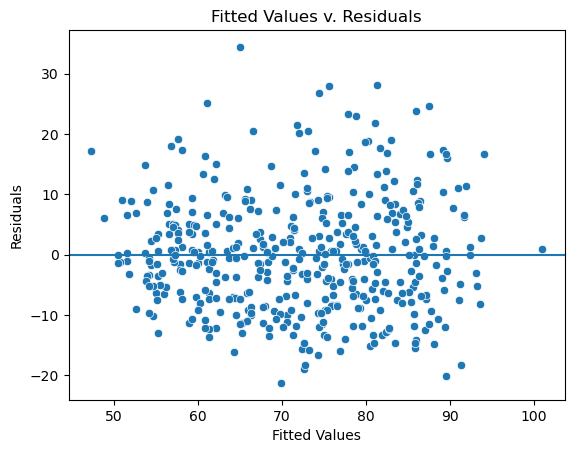

In [193]:
# Create a scatterplot with the fitted values from the model and the residuals.


fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.


fig.axhline(0)

# Show the plot.
plt.show()

In this task, we successfully built a multiple regression model to predict weight based on height and age using the provided dataset.
When assessing multicollinearity, we checked for heteroscedasticity by examining the residuals of the predictor variables (height and age) and found that the assumption of constant variance between the predictor variables was met.
Additionally, visualizations such as scatterplots of actual versus predicted values and plots of residuals provided insight into the predictive accuracy of the model and the distribution of residuals.

Overall, the multiple regression model predicted weight for height and age well, and the verification process confirmed its reliability.

# Question5:Solutions:

In this analysis, we will identify and discuss two common assumptions of linear regression models, and demonstrate a violation of one of these assumptions using a happyScore data set. We will then perform a model check to diagnose the violation and propose a solution to resolve the problem.

1. Linear regression assumptions :

Linearity: The relationship between the independent variables and the dependent variable must be linear. This means that the variation in the dependent variable must be proportional to the variation in the independent variables.

2. Homoscedasticity: 

The variance of the errors (residuals) must be constant for all levels of the independent variables. In other words, the dispersion of residuals must be the same throughout the range of predicted values.

###### Data set:

For this analysis, we will use a dataset containing information on the happy scrore and the factors that affect it, such as income inequality.

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

#read the dataset
df = pd.read_csv("happyscore_income.csv")
df.head()
df1 = df[["income_inequality", "happyScore"]]
df1.head()


,income_inequality,happyScore
0,31.445556,4.350
1,42.720000,4.033
2,45.475556,6.574
3,30.296250,7.200
4,35.285000,7.284


- linearity

In [286]:
# Build linear regression model
X = df1[['income_inequality']]
y = df1['happyScore']


In [287]:
#Split the Data into Training and Testing Sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [288]:
# Build a Linear Regression Model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

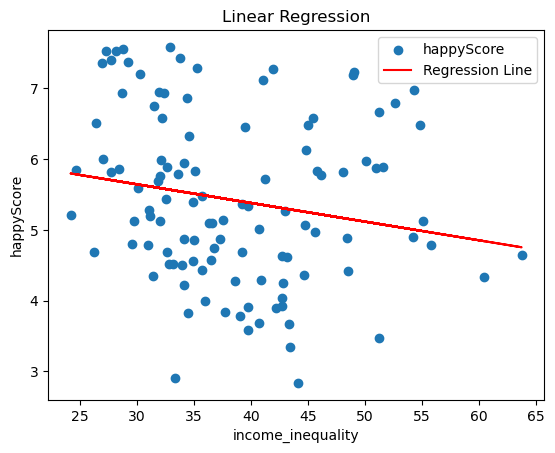

In [292]:
# Visualize the Results
plt.scatter(df1['income_inequality'], df1['happyScore'], label='happyScore')
plt.plot(df1['income_inequality'], model.predict(X), color='red', label='Regression Line')

plt.title('Linear Regression')
plt.xlabel('income_inequality')
plt.ylabel('happyScore')
plt.legend()
plt.show()

the graph is not linear, which contradicts the assumption of linearity

- homoscedasticity

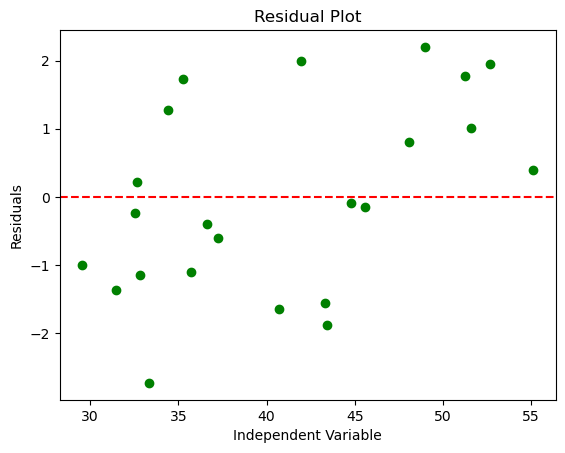

In [195]:
# Step 8: Model Verification - Residual Analysis
residuals = y_test - y_pred

plt.scatter(X_test, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Independent Variable')
plt.ylabel('Residuals')
plt.show()

The variance of the residuals is consistant across all 𝑋. Thus, the assumption of homoscedasticity is met.

### Conclusion and Solution:
 the relationship between the independent variables and the dependent variable is not linear. This implies that a linear regression model may not be appropriate to model the relationship between the variables in this scenario. Instead, we may need to explore other regression models capable of capturing non-linear relationships, such as polynomial regression, exponential regression or spline regression.


    

# Question 6: Nonlinear Model

In this task, we aim to explore the predictive power of nonlinear versus linear regression models using the same dataset as in Task 5. Whereas linear regression assumes a linear relationship between independent and dependent variables, nonlinear models offer greater flexibility to capture complex relationships.

We will propose a non-linear model for predicting the response variable and evaluate its performance against the linear regression model constructed previously. 

- Linear Regression Model

In [293]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)



In [294]:
# Calculate Mean Squared Error (MSE) for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)



- Nonlinear Model - Polynomial Regression

In [295]:
# Define degree of polynomial
degree = 2  

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)



In [296]:
# Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)


In [297]:
# Calculate Mean Squared Error (MSE) for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)


- Compare the performance of linear and polynomial regression models

In [298]:
# print linear and polynomial regression models
print("Mean Squared Error (MSE) - Linear Regression:", mse_linear)
print("Mean Squared Error (MSE) - Polynomial Regression:", mse_poly)

Mean Squared Error (MSE) - Linear Regression: 0.857102582949651
Mean Squared Error (MSE) - Polynomial Regression: 0.7254615190536107


#### In conclusion, 
the MSE of the polynomial regression model is lower than that of the linear regression model, suggesting that the polynomial model is better suited to the data and may be preferred for this prediction task.

## References:

Analyticsvidhya. 6 Assumptions of Linear Regression :Plots and Solutions.
https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/ 


IBM. What is linear regression?. https://www.ibm.com/topics/linear-regression


Graphpad. The goal of regression. https://www.graphpad.com/guides/prism/latest/curve-fitting/reg_the-goal-of-regression.htm


Marco, P. (2024). Introduction to Causal Inference with Machine Learning in Python.Towardsdatascience. https://towardsdatascience.com/introduction-to-causal-inference-with-machine-learning-in-python-1a42f897c6ad


Cornellius, Y.(2022). 4 Python Packages to Learn Causal Analysis. Towardsdatascience.
https://towardsdatascience.com/4-python-packages-to-learn-causal-analysis-9a8eaab9fdab


Akansha, K. Everything you need to know about Hypothesis Testing in Machine Learning. Analyticsvidhya. https://www.analyticsvidhya.com/blog/2021/09/hypothesis-testing-in-machine-learning-everything-you-need-to-know/


Anthony, F.(2022). Correlation Is Not Causation. Builtin. https://builtin.com/data-science/correlation-is-not-causation


Pritha, B.(2023). Correlation vs. Causation | Difference, Designs & Examples. Scribbr.https://www.scribbr.com/methodology/correlation-vs-causation/



# Dataset: 
https://www.kaggle.com/datasets/simonezappatini/body-fat-extended-dataset